In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [418]:
df_train = pd.read_csv('df_train.csv')
df_test  = pd.read_csv('df_test.csv')

In [419]:
# df_train

## Explonatory Data Analysis

Independent variable (Target) is `SalePrice`

In [420]:
df_train.SalePrice.dtypes

dtype('int64')

1.8828757597682129


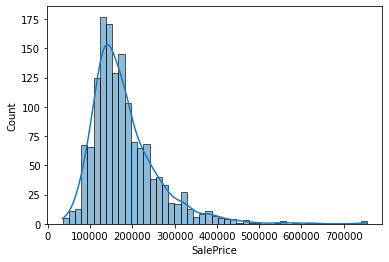

In [421]:
sns.histplot(data=df_train,x="SalePrice", kde=True)
print(df_train.SalePrice.skew())

We will adjust skewness later

In [422]:
# df_train['SalePrice'] = np.log(df_train['SalePrice']
# sns.histplot(data=df_train,x="SalePrice", kde=True)
# sns.histplot(data=df_train,x="SalePrice", kde=True)

In [423]:
numerical_features = list(df_train.select_dtypes('number').columns[:-1])
categorical_features = list(df_train.select_dtypes('object').columns)

print('The number of numerical features is ', len(numerical_features)) 
print('The number of catergorical features is ', len(categorical_features)) 

The number of numerical features is  33
The number of catergorical features is  28


### Numerical data

In [424]:
# f = pd.melt(df_train[numerical_features])
# fg = sns.FacetGrid(f, col='variable',  col_wrap=3,sharex=False, sharey=False,height=3.5, aspect=1.2)
# fg.map(sns.histplot, "value")

In [425]:
# df_train[numerical_features].skew().sort_values()

In [426]:
keep_cols = ['LotArea', 'TotalBsmtSF','OverallQual','1stFlrSF',\
             'GrLivArea','GarageArea', 'YrSold']

drop_cols = [x for x in numerical_features if x not in keep_cols]

In [427]:
df_train.drop(columns = drop_cols,inplace=True)

In [428]:
df_train[keep_cols].describe().min()

LotArea        1300.000000
TotalBsmtSF       0.000000
OverallQual       1.000000
1stFlrSF        334.000000
GrLivArea       334.000000
GarageArea        0.000000
YrSold            1.328095
dtype: float64

#### Method 1

In [401]:
adjust_features = df_train.select_dtypes('number').columns.drop('YrSold')
df_train[adjust_features] = df_train[adjust_features]/df_train[adjust_features].mean() +0.1

Text(0.5, 1.0, 'GarageArea')

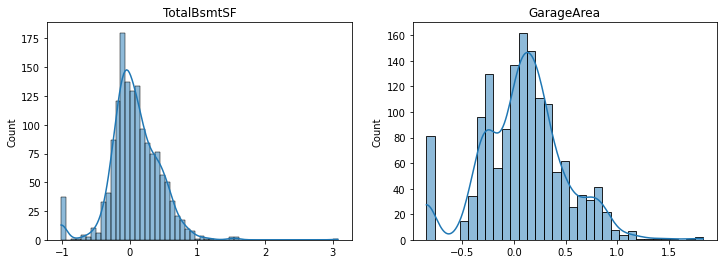

In [402]:
fig, axs = plt.subplots(ncols=2,figsize=(12,4))
xt1, _ = stats.boxcox(df_train.TotalBsmtSF)
sns.histplot(data=xt1, kde=True,ax=axs[0])
axs[0].set_title('TotalBsmtSF')

xt2, _ = stats.boxcox(df_train.GarageArea)
sns.histplot(data=xt2, kde=True,ax=axs[1])
axs[1].set_title('GarageArea')


In [399]:
adjust_features= adjust_features.drop(['TotalBsmtSF','GarageArea'])

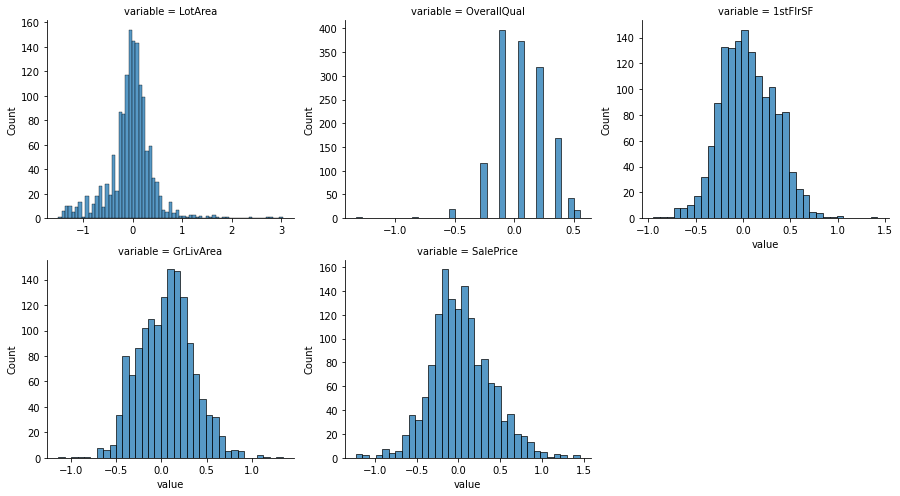

In [400]:
df_train[adjust_features] = np.log(df_train[adjust_features])
f = pd.melt(df_train[adjust_features])
fg = sns.FacetGrid(f, col='variable',  col_wrap=3,sharex=False, sharey=False,height=3.5, aspect=1.2)
fg.map(sns.histplot, "value")

#### Method 2

In [429]:
adjust_features = df_train.select_dtypes('number').columns.drop('YrSold')
df_train[adjust_features] = np.log(df_train[adjust_features]/df_train[adjust_features].mean() +0.1)

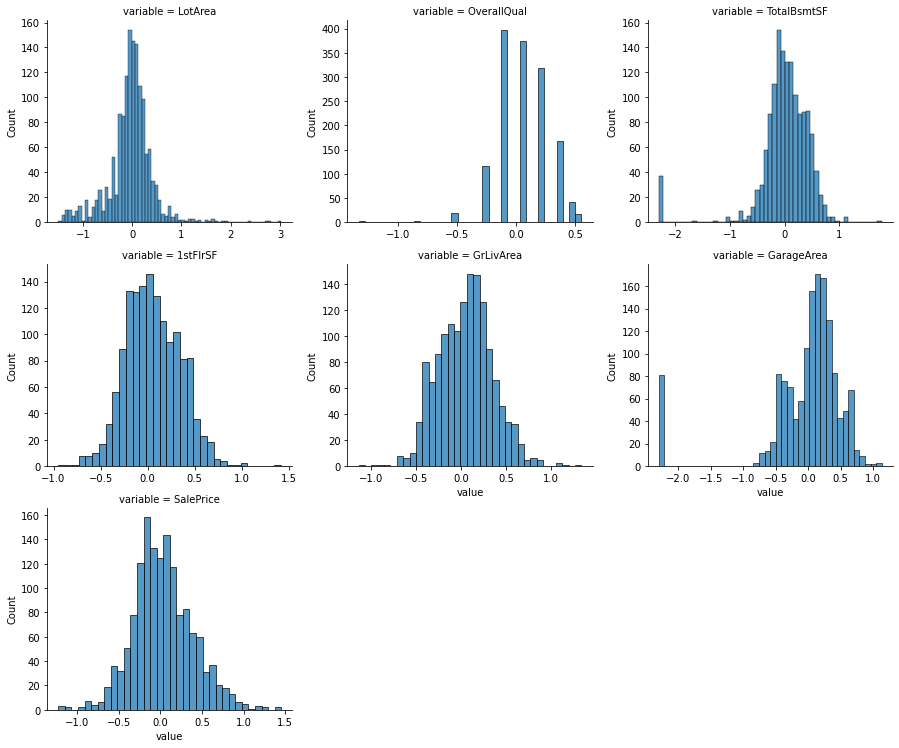

In [430]:
f = pd.melt(df_train[adjust_features])
fg = sns.FacetGrid(f, col='variable',  col_wrap=3,sharex=False, sharey=False,height=3.5, aspect=1.2)
fg.map(sns.histplot, "value")

In [330]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# xt, _ = stats.boxcox(df_train.TotalBsmtSF)
# # stats.probplot(xt, dist=stats.norm,plot=ax)
# sns.histplot(data=xt, kde=True)
# plt.show()

### Correlations

In [15]:
df_train.select_dtypes('object').nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
ExterQual         4
ExterCond         5
Foundation        6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64